Voice Analysis
===

# Hello, pyworld !

## 解析

In [1]:
from scipy.io import wavfile
import pyworld as pw
import numpy as np
import matplotlib.pyplot as plt

WAV_FILE = "../data/sample.wav"

# fs : sampling frequency, 音楽業界では44,100Hz
# data : arrayの音声データが入る 
fs, data = wavfile.read(WAV_FILE)

# floatでないとworldは扱えない
data = data.astype(np.float)

_f0, _time = pw.dio(data, fs)    # 基本周波数の抽出
f0 = pw.stonemask(data, _f0, _time, fs)  # 基本周波数の修正

# --- これは音声の合成に用いる(今回は使わない)
# sp = pw.cheaptrick(data, f0, _time, fs)  # スペクトル包絡の抽出
# ap = pw.d4c(data, f0, _time, fs)         # 非周期性指標の抽出
# y = pw.synthesize(f0, sp, ap, fs)    # 合成


# 可視化
plt.plot(data, label="Raw Data")
plt.legend(fontsize=10)
plt.show();

plt.plot(f0, linewidth=3, color="green", label="F0 contour")
plt.legend(fontsize=10)
plt.show();

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 計算時間

In [2]:
from scipy.io import wavfile
import pyworld as pw
import numpy as np
import matplotlib.pyplot as plt
import time

def calc_time(file_name):
    start = time.time()

    fs, data = wavfile.read(WAV_FILE)

    data = data.astype(np.float)

    _f0, _time = pw.dio(data, fs)   
    f0 = pw.stonemask(data, _f0, _time, fs)

    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

    return elapsed_time

def plot_calc_time():
    file_names = os.listdir("../data")

    plt.figure()
    t_list = []
    elapsed_time_list = []
    for file_name in file_names:
        t = int(file_name[:-4])
        elapsed_time = calc_time(file_name)

        t_list.append(t)
        elapsed_time_list.append(elapsed_time)

    t_list.sort()
    elapsed_time_list.sort()
    plt.plot(t_list, elapsed_time_list, marker=".")
    plt.title("Time for calculating f0")
    plt.xlabel("wav_time")
    plt.ylabel("calc_time")
    plt.grid()
    plt.show();

# plot_calc_time()

# Hello, pyreaper !

## 解析

Populating the interactive namespace from numpy and matplotlib


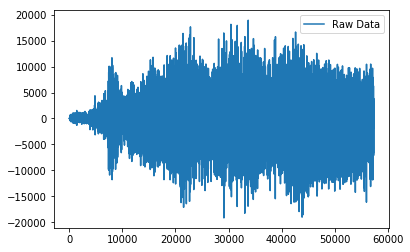

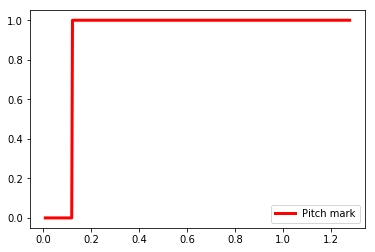

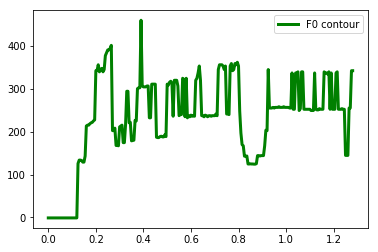

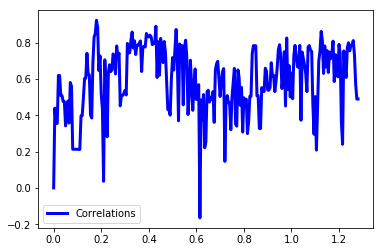

In [3]:
%pylab inline
rcParams["figure.figsize"] = (16, 4)

%matplotlib inline
import pysptk
import pyreaper
import sys,os
import matplotlib.pyplot as plt
from scipy.io import wavfile


file = "../data/sample.wav"
fs, data = wavfile.read(file)

plt.plot(data, label="Raw Data")
plt.legend(fontsize=10)
plt.show();

pm_times, pm, f0_times, f0, corr = pyreaper.reaper(data, fs)

plt.plot(pm_times, pm, linewidth=3, color="red", label="Pitch mark")
plt.legend(fontsize=10)
plt.show();

plt.plot(f0_times, f0, linewidth=3, color="green", label="F0 contour")
plt.legend(fontsize=10)
plt.show();

plt.plot(f0_times, corr, linewidth=3, color="blue", label="Correlations")
plt.legend(fontsize=10)
plt.show();

## 計算時間

In [4]:
import pysptk
import pyreaper
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


def calc_time(file_name):
    start = time.time()

    fs, data = wavfile.read(file_name)

    pm_times, pm, f0_times, f0, corr = pyreaper.reaper(data, fs)

    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

    return elapsed_time

def plot_calc_time():
    file_names = os.listdir("../data")

    plt.figure()
    t_list = []
    elapsed_time_list = []
    for file_name in file_names:
        t = int(file_name[:-4])
        elapsed_time = calc_time(file_name)

        t_list.append(t)
        elapsed_time_list.append(elapsed_time)

    t_list.sort()
    elapsed_time_list.sort()
    plt.plot(t_list, elapsed_time_list, marker=".")
    plt.title("Time for calculating f0")
    plt.xlabel("wav_time")
    plt.ylabel("calc_time")
    plt.grid()
    plt.show();

# plot_calc_time()